## IMPORTING LIBRARIES
___

First, we import the library for preprocceng data, visualization, machine learning and Deep learning we use in our project.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
print("Successful import")

Successful import


## LOADING DATA
___

In [79]:
path = '/content/drive/MyDrive/Data_Science /Data_set/weather_data_24hr.csv'
df = pd.read_csv(path)
print(df.head(3),"\n\n", df.tail(3))
print(df.columns)

   loc_id        date  maxtempC  maxtempF  mintempC  mintempF  avgtempC  \
0       1  2008-07-01        34        94        24        74        28   
1       1  2008-07-02        34        94        23        73        28   
2       1  2008-07-03        34        92        23        73        27   

   avgtempF  totalprecipMM  totalprecipIn  ...  WindGustKmph  FeelsLikeC  \
0        83            0.0            0.0  ...            15          28   
1        82            0.0            0.0  ...            18          28   
2        81            0.0            0.0  ...            15          28   

   FeelsLikeF  uvIndex   sunrise    sunset  moonrise   moonset  \
0          83        7  05:34 AM  07:47 PM  03:17 AM  06:24 PM   
1          83        7  05:35 AM  07:47 PM  04:21 AM  07:29 PM   
2          82        7  05:35 AM  07:46 PM  05:32 AM  08:24 PM   

       moon_phase  moon_illumination  
0  Waning Gibbous               89.7  
1  Waning Gibbous               82.8  
2  Waning Gi

In [80]:
path_loc = '/content/drive/MyDrive/Data_Science /Data_set/locations.csv'
df_loc = pd.read_csv(path_loc)
df_loc.head(3)

,id,lat,lon,place
0,1,31.9539,35.9106,Amman
1,2,32.5568,35.8469,Irbid
2,3,29.5321,35.0063,Aqaba


### About the Data :
* we have a weather data for 3 cities in jordan "Amman, Irbid, and Aqaba" we want to study the relationship for every city with some feature to predect the max Tempreture.
* we have the Data set contain the weather mesuerment for every day from 01.07.2008 to 26.04.2021
* The Data set has the feature in 2 scale like tempreture  " F and C ".
* Now the Data set has 41 feature with date and temp.
* And not forget to ask what we can predect more than max temp.
* We see the Data set has categorical and numerical Data, and the numerical Data has continus and descreate Data.  

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14049 entries, 0 to 14048
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc_id             14049 non-null  int64  
 1   date               14049 non-null  object 
 2   maxtempC           14049 non-null  int64  
 3   maxtempF           14049 non-null  int64  
 4   mintempC           14049 non-null  int64  
 5   mintempF           14049 non-null  int64  
 6   avgtempC           14049 non-null  int64  
 7   avgtempF           14049 non-null  int64  
 8   totalprecipMM      14049 non-null  float64
 9   totalprecipIn      14049 non-null  float64
 10  windspeedMiles     14049 non-null  int64  
 11  windspeedKmph      14049 non-null  int64  
 12  sunhour            14049 non-null  float64
 13  winddirdegree      14049 non-null  int64  
 14  winddir16point     14049 non-null  object 
 15  weatherCode        14049 non-null  int64  
 16  weatherIconUrl     140

## DATA VISULAIZATION AND CLEANING

* First step we will remove the columns tempreture in F and any columns with miles, inches, weather icon url and wind diriction 16 point.
* Then we will see the duplicate and missing value.

### Data Cleaning

In [82]:
df.drop(['maxtempF','mintempF','avgtempF','windspeedMiles','visibilityMiles',
           'pressureInches','HeatIndexF','DewPointF','WindChillF','WindGustMiles','totalprecipIn','weatherIconUrl','winddir16point','FeelsLikeF','moon_phase','weatherDesc']
        ,axis = 1
        , inplace= True)
df.head(3)

,loc_id,date,maxtempC,mintempC,avgtempC,totalprecipMM,windspeedKmph,sunhour,winddirdegree,weatherCode,...,DewPointC,WindChillC,WindGustKmph,FeelsLikeC,uvIndex,sunrise,sunset,moonrise,moonset,moon_illumination
0,1,2008-07-01,34,24,28,0.0,12,13.6,296,113,...,14,28,15,28,7,05:34 AM,07:47 PM,03:17 AM,06:24 PM,89.7
1,1,2008-07-02,34,23,28,0.0,13,13.6,293,113,...,14,28,18,28,7,05:35 AM,07:47 PM,04:21 AM,07:29 PM,82.8
2,1,2008-07-03,34,23,27,0.0,12,13.6,303,113,...,14,27,15,28,7,05:35 AM,07:46 PM,05:32 AM,08:24 PM,75.9


In [83]:
print(f"--> Sum os null value :\n\n{df.isnull().sum()}")
print(f"\n\n--> Sum of duplicated::\n\n{df.duplicated().sum()}")

--> Sum os null value :

loc_id               0
date                 0
maxtempC             0
mintempC             0
avgtempC             0
totalprecipMM        0
windspeedKmph        0
sunhour              0
winddirdegree        0
weatherCode          0
humidity             0
visibilityKm         0
pressureMB           0
cloudcover           0
HeatIndexC           0
DewPointC            0
WindChillC           0
WindGustKmph         0
FeelsLikeC           0
uvIndex              0
sunrise              0
sunset               0
moonrise             0
moonset              0
moon_illumination    0
dtype: int64


--> Sum of duplicated::

0


***notice:
The Data set hasn't missing and duplicate value.**


In [84]:
#we see the weather code relate with waether description ,if yes we will drop the weather code
print(df.info())
#print(df['weatherDesc'].unique())
print(df['weatherCode'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14049 entries, 0 to 14048
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc_id             14049 non-null  int64  
 1   date               14049 non-null  object 
 2   maxtempC           14049 non-null  int64  
 3   mintempC           14049 non-null  int64  
 4   avgtempC           14049 non-null  int64  
 5   totalprecipMM      14049 non-null  float64
 6   windspeedKmph      14049 non-null  int64  
 7   sunhour            14049 non-null  float64
 8   winddirdegree      14049 non-null  int64  
 9   weatherCode        14049 non-null  int64  
 10  humidity           14049 non-null  int64  
 11  visibilityKm       14049 non-null  int64  
 12  pressureMB         14049 non-null  int64  
 13  cloudcover         14049 non-null  int64  
 14  HeatIndexC         14049 non-null  int64  
 15  DewPointC          14049 non-null  int64  
 16  WindChillC         140

**we need to change the date to datetime**

In this we change the days and month to periodec time for machine learning understand we have a time series and seasonal relation in data .

In [85]:
df['date']= pd.to_datetime(df['date'])
# create a column of year
#df['year']= df['date'].dt.year

#function to change the month and days to cyclic parameters

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data
# create a column of month
df['month'] = df['date'].dt.month
df = encode(df, 'month', 12)

# create a column of day
df['day'] = df['date'].dt.day
df = encode(df, 'day', 31)
df.set_index('date', inplace=True)

print(df.head())

            loc_id  maxtempC  mintempC  avgtempC  totalprecipMM  \
date                                                              
2008-07-01       1        34        24        28            0.0   
2008-07-02       1        34        23        28            0.0   
2008-07-03       1        34        23        27            0.0   
2008-07-04       1        34        21        27            0.0   
2008-07-05       1        34        23        28            0.0   

            windspeedKmph  sunhour  winddirdegree  weatherCode  humidity  ...  \
date                                                                      ...   
2008-07-01             12     13.6            296          113        48  ...   
2008-07-02             13     13.6            293          113        47  ...   
2008-07-03             12     13.6            303          113        51  ...   
2008-07-04             13     13.6            303          113        54  ...   
2008-07-05             13     13.6          

Text(0.5, 0, 'Days In Year')

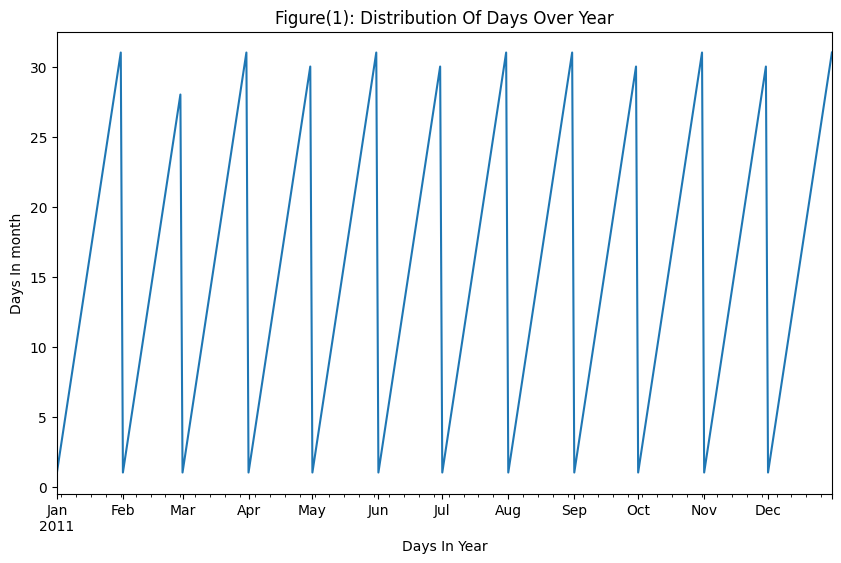

In [86]:
# roughly a year's span section
plt.figure(figsize=(10, 6))

df_loc1 = df[df['loc_id'] == 1]
df_year = df_loc1.loc['2011-01-01':'2011-12-31']
tm = df_year["day"].plot()
tm.set_title("Figure(1): Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

Figure(1) show the distripution of days over year, we see the the date in data start in july and see the distribution about the days over month.

Text(0.5, 0, 'Sine Encoded Months')

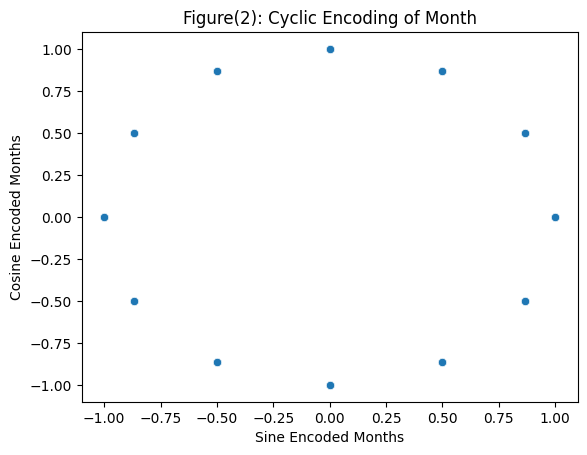

In [87]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=df)
cyclic_month.set_title("Figure(2): Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")

Figure(2) show how we change the month over year as cyclic over year we use sin and cosine to make a cyclic distrubution.

Text(0.5, 0, 'Sine Encoded Months')

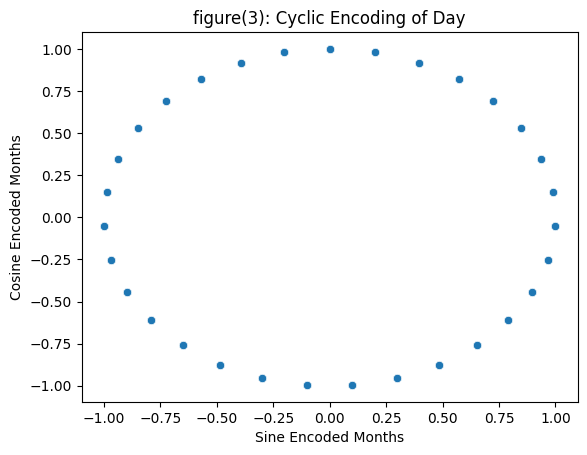

In [88]:
cyclic_month = sns.scatterplot(x="day_sin",y="day_cos",data=df)
cyclic_month.set_title("figure(3): Cyclic Encoding of Day")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")

Figure(3):

In [89]:
# change the wind direction to sin and cosin
df['wind_cos']=np.cos(np.deg2rad(df['winddirdegree']))
df['wind_sin']=np.sin(np.deg2rad(df['winddirdegree']))

Text(0.5, 0, 'Sine Encoded wind')

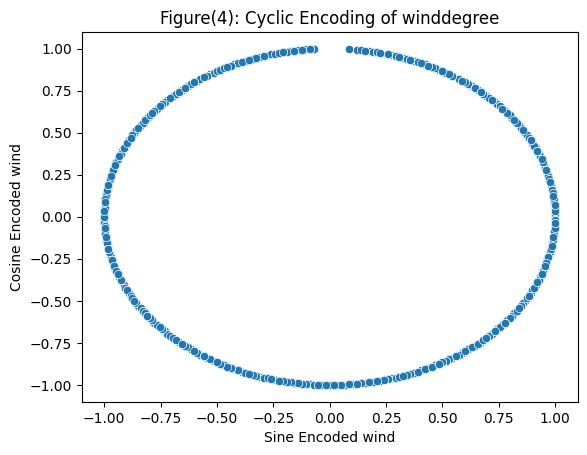

In [90]:
cyclic_month = sns.scatterplot(y="wind_cos",x="wind_sin",data=df)
cyclic_month.set_title("Figure(4): Cyclic Encoding of winddegree")
cyclic_month.set_ylabel("Cosine Encoded wind")
cyclic_month.set_xlabel("Sine Encoded wind")

**we need to change the time to numbers**

In [91]:
def change_time(data ,col):
  data[col]=pd.to_datetime(data[col],format='%I:%M %p',errors='coerce').dt.hour + pd.to_datetime(data[col],format='%I:%M %p',errors='coerce').dt.minute /60
  return data

change_time(df,'sunrise')
change_time(df,'sunset')
change_time(df,'moonrise')
change_time(df,'moonset')

,loc_id,maxtempC,mintempC,avgtempC,totalprecipMM,windspeedKmph,sunhour,winddirdegree,weatherCode,humidity,...,moonset,moon_illumination,month,month_sin,month_cos,day,day_sin,day_cos,wind_cos,wind_sin
date,,,,,,,,,,,,,,,,,,,,,
2008-07-01,1,34,24,28,0.0,12,13.6,296,113,48,...,18.400000,89.7,7,-0.500000,-0.866025,1,0.201299,0.979530,0.438371,-0.898794
2008-07-02,1,34,23,28,0.0,13,13.6,293,113,47,...,19.483333,82.8,7,-0.500000,-0.866025,2,0.394356,0.918958,0.390731,-0.920505
2008-07-03,1,34,23,27,0.0,12,13.6,303,113,51,...,20.400000,75.9,7,-0.500000,-0.866025,3,0.571268,0.820763,0.544639,-0.838671
2008-07-04,1,34,21,27,0.0,13,13.6,303,113,54,...,21.166667,69.0,7,-0.500000,-0.866025,4,0.724793,0.688967,0.544639,-0.838671
2008-07-05,1,34,23,28,0.0,13,13.6,294,113,46,...,21.800000,62.1,7,-0.500000,-0.866025,5,0.848644,0.528964,0.406737,-0.913545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-22,3,31,18,25,0.0,24,13.1,223,113,29,...,3.150000,75.9,4,0.866025,-0.500000,22,-0.968077,-0.250653,-0.731354,-0.681998
2021-04-23,3,31,19,24,0.0,22,13.1,308,113,29,...,3.800000,82.8,4,0.866025,-0.500000,23,-0.998717,-0.050649,0.615661,-0.788011
2021-04-24,3,34,20,27,0.0,8,13.1,298,113,37,...,4.400000,89.7,4,0.866025,-0.500000,24,-0.988468,0.151428,0.469472,-0.882948


In [92]:
#we drop the moon phase above, this reason we dont need this code cause we see the moon illumination enough and the same in our broject.
#df['moon_phase_encodeed']=LabelEncoder().fit_transform(df['moon_phase'])

In [93]:
print(df.isnull().sum())

loc_id                 0
maxtempC               0
mintempC               0
avgtempC               0
totalprecipMM          0
windspeedKmph          0
sunhour                0
winddirdegree          0
weatherCode            0
humidity               0
visibilityKm           0
pressureMB             0
cloudcover             0
HeatIndexC             0
DewPointC              0
WindChillC             0
WindGustKmph           0
FeelsLikeC             0
uvIndex                0
sunrise                0
sunset                 0
moonrise             474
moonset              477
moon_illumination      0
month                  0
month_sin              0
month_cos              0
day                    0
day_sin                0
day_cos                0
wind_cos               0
wind_sin               0
dtype: int64


In [94]:
# Moonrise and moonset have not big effect to the maxtempC
#In Future we can see practicaly if make any defrance about tempreture
df.drop(['moonrise','moonset'],axis=1,inplace=True)

In [95]:
# We seprate the data to 3 city to train each city as alone
df_amman = df[df['loc_id']==1]
df_irbed = df[df['loc_id']==2]
df_aqaba = df[df['loc_id']==3]
df_amman.to_csv('/content/drive/MyDrive/Data_Science /Data_set/amman_data.csv',index=True)
df_irbed.to_csv('/content/drive/MyDrive/Data_Science /Data_set/irbed_data.csv',index=True)
df_aqaba.to_csv('/content/drive/MyDrive/Data_Science /Data_set/aqaba_data.csv',index=True)